Simplify and study the above formalism

1

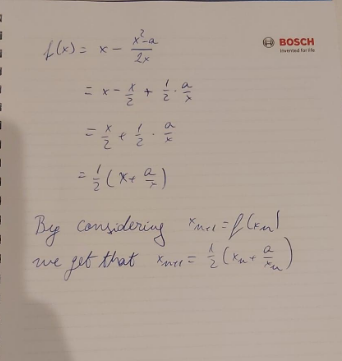

2

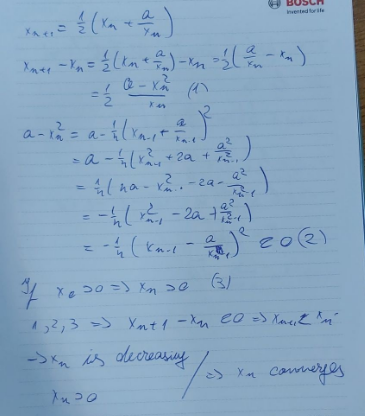
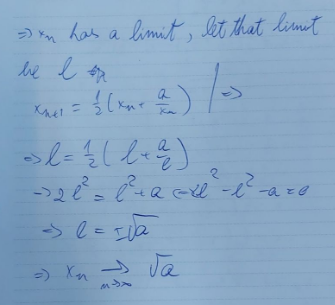

Study the convergence of a "modified" Newton algorithm

1

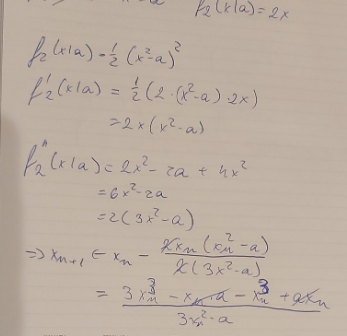
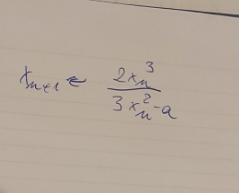

2

In [10]:
import Plots
using LinearAlgebra
a=8;
function iter_f(f,n::Integer,x₀::T) where T <: Real
    vcat([x₀],[x₀=f(x₀) for _ in 1:n]...)
end
;

In [41]:
df(x, a) = 2*x*(x^2-a)
ddf(x, a) = 2*(3*x^2-a)

f = x -> x-df(x, a)/ddf(x, a)
;

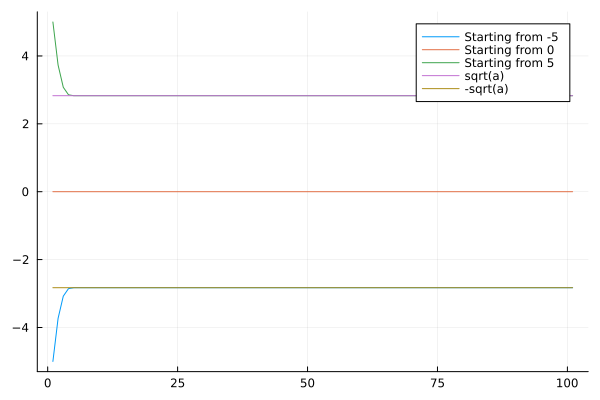

In [42]:
n = 100
p = Plots.plot( iter_f(f,n,-5),label="Starting from -5" )
Plots.plot!(p, iter_f(f,n,0), label="Starting from 0" )
Plots.plot!(p, iter_f(f,n,5),label="Starting from 5" )
Plots.plot!(p, x->sqrt(a),label="sqrt(a)" )
Plots.plot!(p, x->-sqrt(a),label="-sqrt(a)" )



We can see that for 0 as starting point, the algorithm does not converge to $\sqrt{a}$, therefore we have tested that not for all inputs the algorithm converges to $\sqrt{a}$.
Also, the limit can be 0, or +- $\sqrt{a}$ because:

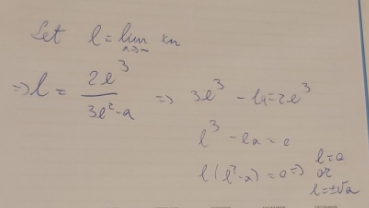

3, 4
We can see that the second order derivative is negative in the interval ($-\sqrt{\frac{a}{3}}$, $\sqrt{\frac{a}{3}}$), otherwise is positive. When the second order derivative is negative, the function is concave, therefore the algorithm finds the solution 0 because that is where the maximum is, otherwise is -$\sqrt{a}$, and $\sqrt{a}$ respectively because the function is convex with minimum at those points.

Therefore, the starting point must be chosen in a region in which the function is convex, otherwise a maximum is reached in a concave region.



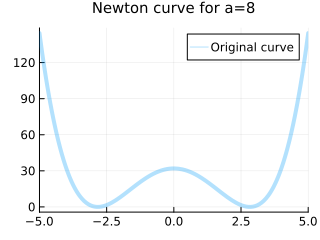

In [8]:
Plots.plot(x->1/2*(x^2-a)^2,
    xlim=(-5,5), size=(320,240),
    titlefontsize=10,label="Original curve",
    title="Newton curve for a=$a",w=4,alpha=.3
)

Define an algorithm for computing the  𝑘 -th root of a positive number  𝑎

We choose $f_3(x|a) = \int (x^k -a) dx = \frac{x^{k+1}}{k}-a \cdot x + C$. For simplicity, we set C=0 

As such the sequence becomes

$x_{n+1} \leftarrow x_n - \frac{x^k-a}{k \cdot x^{k-1}}$

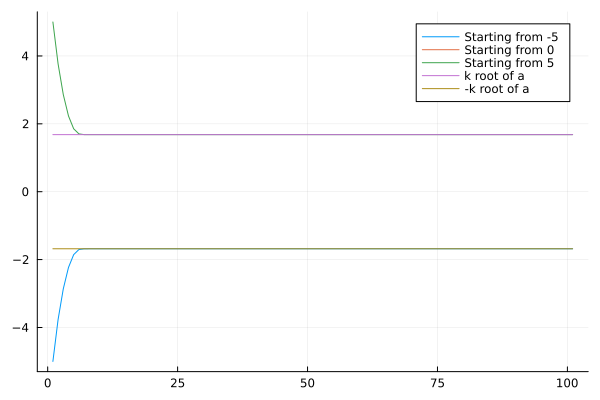

In [53]:
k = 4

df(x, a, k) = x^k-a
ddf(x, a, k) = k*x^(k-1)

f = x -> x-df(x, a, k)/ddf(x, a, k)

n = 100
p = Plots.plot( iter_f(f,n,-5),label="Starting from -5" )
Plots.plot!(p, iter_f(f,n,0), label="Starting from 0" )
Plots.plot!(p, iter_f(f,n,5),label="Starting from 5" )
Plots.plot!(p, x->a^(1/k),label="k root of a" )
Plots.plot!(p, x->-a^(1/k),label="-k root of a" )

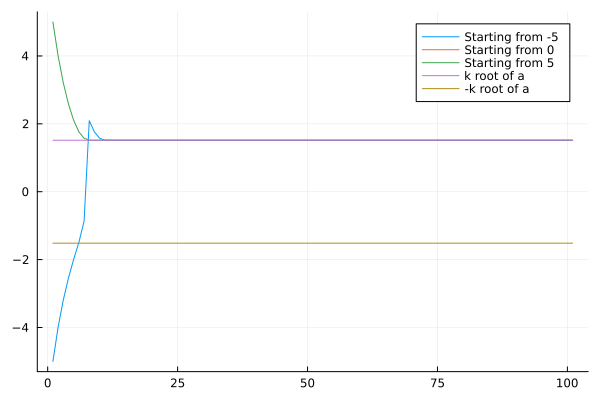

In [54]:
k = 5

df(x, a, k) = x^k-a
ddf(x, a, k) = k*x^(k-1)

f = x -> x-df(x, a, k)/ddf(x, a, k)

n = 100
p = Plots.plot( iter_f(f,n,-5),label="Starting from -5" )
Plots.plot!(p, iter_f(f,n,0), label="Starting from 0" )
Plots.plot!(p, iter_f(f,n,5),label="Starting from 5" )
Plots.plot!(p, x->a^(1/k),label="k root of a" )
Plots.plot!(p, x->-a^(1/k),label="-k root of a" )

We can see from the plot that the sequence converges to $\sqrt[k]{a}$

We note that if k is odd, the second order derivative will be positive, hence the function is convex and we can choose any starting value, otherwise, if k is even, the second order derivative is concave for negative values and the algorithm converges to $-\sqrt[k]{a}$ and for positive to $-\sqrt[k]{a}$. 